## Descripción:

Este notebook contiene los análisis univariados, bivariados y multivariados.
Así como la limpieza final del TAD, para poder proceder a la modelación supervisada y no supervisada. Así como a las aplicaciones de negocio.

# 0. Librerías y carga de datos

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os


pd.set_option('display.max_columns', 500)

%matplotlib inline

path = os.getcwd()
data_path = os.getcwd()[:-len('notebooks')]+'Outputs/'
graphs_path = path[:-len('notebooks')] + 'Graphs/'

files = os.listdir(data_path)
files

['TAD+cl_gmimp.csv', 'TAD.csv']

In [99]:
df = pd.read_csv(data_path + 'TAD.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1704,6.504722,7.948333,7.373611,16.983333,17,0.068273,12,29,0.855422,0.918103
1,31,Yes,Travel_Frequently,Research & Development,10,Below,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1800,6.725278,8.558889,7.718889,18.800000,13,0.052209,12,25,0.903614,0.953390
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,1680,6.198333,7.993611,7.013056,18.683333,7,0.028112,12,19,0.843373,0.867769
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,1680,6.280556,7.890833,7.193611,17.033333,14,0.056225,12,26,0.843373,0.893617
4,32,No,Travel_Rarely,Research & Development,10,Below,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,1944,7.310278,8.828333,8.006111,18.033333,4,0.016064,12,16,0.975904,0.991837


In [100]:
df.describe()

,Age,DistanceFromHome,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,1809.142857,6.861044,8.540268,7.700653,17.966387,12.734694,0.051143,12.0,24.734694,0.908204,0.956177
std,9.133301,8.105026,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,331.365241,1.347843,1.342733,1.340217,0.823259,5.503779,0.022104,0.0,5.503779,0.166348,0.167573
min,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
25%,30.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1560.000000,5.814097,7.514444,6.673125,17.383333,8.000000,0.032129,12.0,20.000000,0.783133,0.825563
50%,36.000000,7.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1728.000000,6.583611,8.254722,7.406667,17.966667,13.000000,0.052209,12.0,25.000000,0.867470,0.921053
75%,43.000000,14.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1944.000000,7.482917,9.186111,8.368542,18.533333,17.000000,0.068273,12.0,29.000000,0.975904,1.038462
max,60.000000,29.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2712.000000,10.284722,12.088611,11.030833,20.683333,24.000000,0.096386,12.0,36.000000,1.361446,1.372881


In [101]:
len(df.dropna())/len(df)

0.9750566893424036

# 1. División de columnas

In [102]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'total_hours', 'minimum_hours',
       'maximum_hours', 'mean_hours', 'std_min', 'absences', 'absences_pct',
       'of_absence', 'total_absences', 'Expected_time_vs_real_time',
       'Expected_vacations_time_vs_real_time'],
      dtype='object')

In [103]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1704,6.504722,7.948333,7.373611,16.983333,17,0.068273,12,29,0.855422,0.918103


In [104]:
tar = 'Attrition'
ID = 'EmployeeID'
empcount = 'EmployeeCount'
ordinals = ['JobLevel', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction',
           'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
categoricals = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'Over18']
continuos = [x for x in df.columns if x not in [tar, ID, empcount] + ordinals + categoricals]

In [105]:
continuos

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'total_hours',
 'minimum_hours',
 'maximum_hours',
 'mean_hours',
 'std_min',
 'absences',
 'absences_pct',
 'of_absence',
 'total_absences',
 'Expected_time_vs_real_time',
 'Expected_vacations_time_vs_real_time']

# 2. Tratamiento de Missings

## 2.1 Quitando los missings

In [106]:
nomissings = df.dropna()
nomissings.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1704,6.504722,7.948333,7.373611,16.983333,17,0.068273,12,29,0.855422,0.918103
1,31,Yes,Travel_Frequently,Research & Development,10,Below,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1800,6.725278,8.558889,7.718889,18.800000,13,0.052209,12,25,0.903614,0.953390
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,1680,6.198333,7.993611,7.013056,18.683333,7,0.028112,12,19,0.843373,0.867769


In [107]:
nomissings.shape

(4300, 40)

### 2.1.1 Continuas

In [108]:
from scipy.stats import ks_2samp

In [109]:
nomissings.describe(percentiles = [x/10 for x in range(10)] + [.01, .99])

,Age,DistanceFromHome,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953,1809.661395,6.863203,8.542650,7.702739,17.964457,12.729302,0.051122,12.0,24.729302,0.908465,0.956447
std,9.146517,8.097059,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946,331.707840,1.350142,1.345052,1.342715,0.823957,5.494883,0.022068,0.0,5.494883,0.166520,0.167887
min,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
0%,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
1%,19.000000,1.000000,1.0,46.990000,1.000000,13590.000000,0.000000,11.000000,8.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1368.000000,5.058292,6.762492,5.988056,16.033333,2.000000,0.008032,12.0,14.000000,0.686747,0.740426
10%,26.000000,1.000000,1.0,446.900000,1.000000,23130.000000,0.000000,11.000000,8.0,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1440.000000,5.366639,7.044722,6.203028,16.900000,5.000000,0.020080,12.0,17.000000,0.722892,0.769565
20%,29.000000,2.000000,1.0,889.800000,1.000000,26950.000000,1.000000,12.000000,8.0,0.000000,5.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1512.000000,5.662944,7.344556,6.504944,17.266667,7.000000,0.028112,12.0,19.000000,0.759036,0.807692
30%,31.000000,3.000000,1.0,1331.700000,1.000000,33439.000000,1.000000,13.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1584.000000,5.956583,7.647167,6.798528,17.533333,9.000000,0.036145,12.0,21.000000,0.795181,0.842975
40%,34.000000,5.000000,1.0,1773.600000,2.000000,42372.000000,1.000000,13.000000,8.0,0.000000,8.000000,2.000000,5.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1656.000000,6.285222,7.957444,7.107056,17.766667,11.000000,0.044177,12.0,23.000000,0.831325,0.883117


KeyboardInterrupt: 

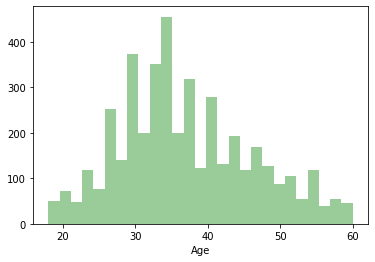

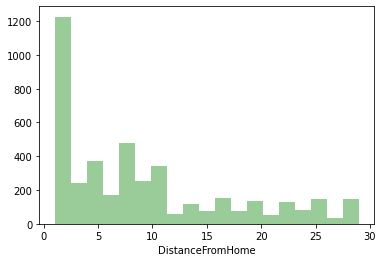

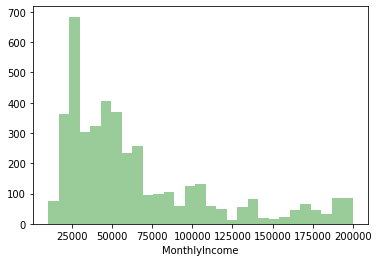

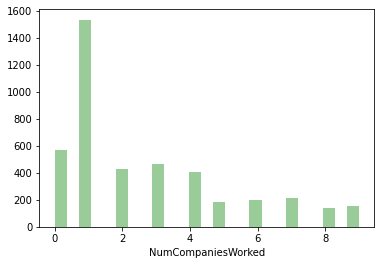

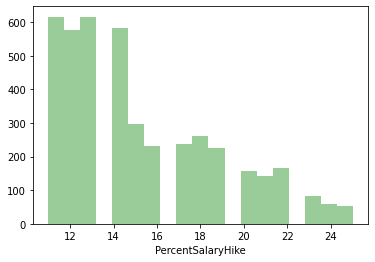

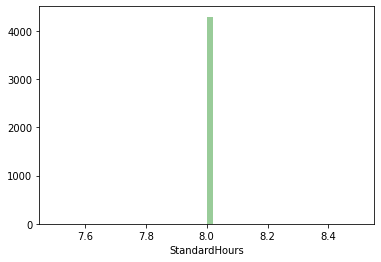

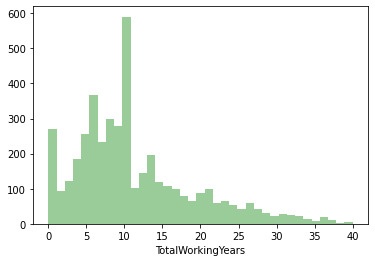

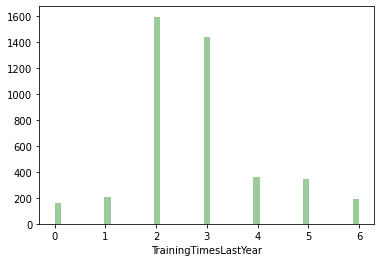

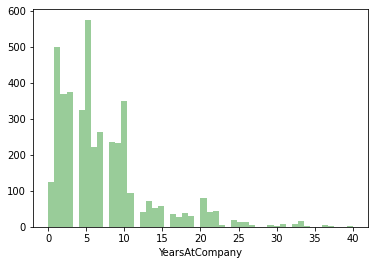

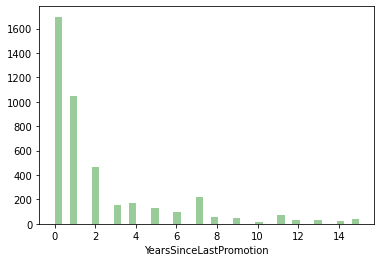

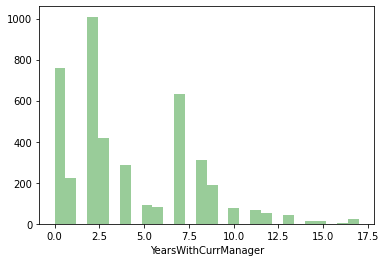

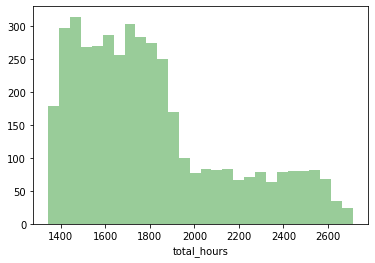

In [110]:
for v in continuos:
    plt.figure()
    sns.distplot(nomissings[v],kde=False, color="green").get_figure().savefig(graphs_path + f'Hist/{v}_without_missings_plot.png')

In [111]:
l_ks = []
for v in continuos:
    l_ks.append((v,ks_2samp(nomissings[v],df[v]).statistic,ks_2samp(nomissings[v],df[v]).pvalue))

ks = pd.DataFrame(l_ks,columns=['feat','ks', 'p-value'])
ks.loc[ks['ks']>=0.1]

,feat,ks,p-value


In [112]:
ks

,feat,ks,p-value
0,Age,0.001155,1.0
1,DistanceFromHome,0.002161,1.0
2,MonthlyIncome,0.001857,1.0
3,NumCompaniesWorked,0.004708,1.0
4,PercentSalaryHike,0.000970,1.0
5,StandardHours,0.000000,1.0
6,TotalWorkingYears,0.002165,1.0
7,TrainingTimesLastYear,0.001012,1.0
8,YearsAtCompany,0.001490,1.0
9,YearsSinceLastPromotion,0.000925,1.0


Como podemos apreciar, después de aplicar la prueba de bondad y ajuste correspondiente de Kolmogorov Smirnov vemos que el elminiar los missings no afectó la distribución de nuestra tabla original. 

### 2.1.2 Discretas

In [113]:
from scipy.stats import chisquare

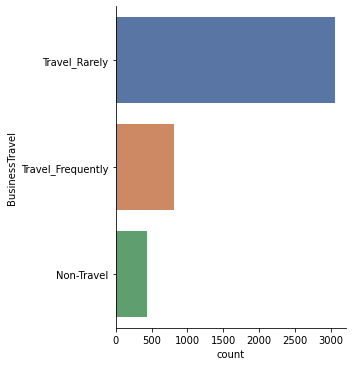

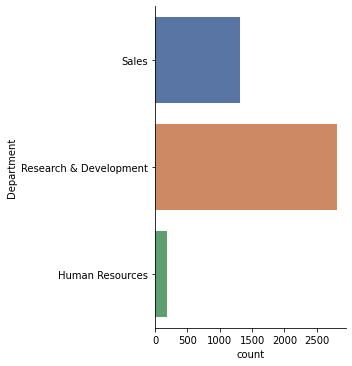

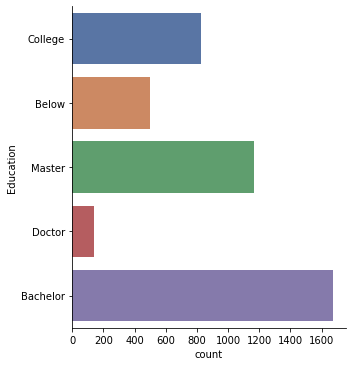

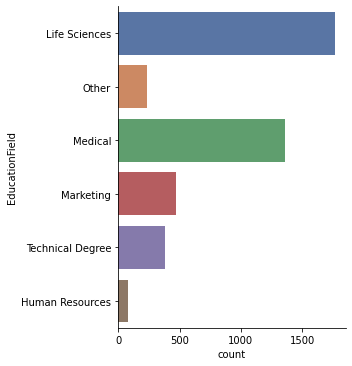

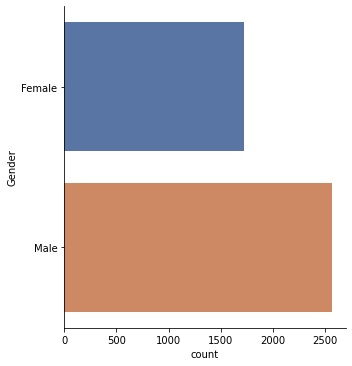

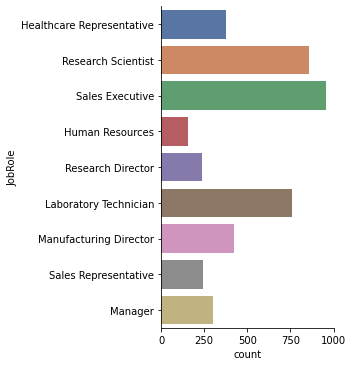

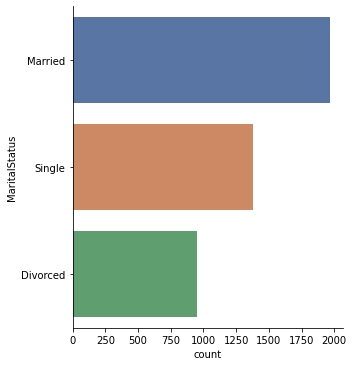

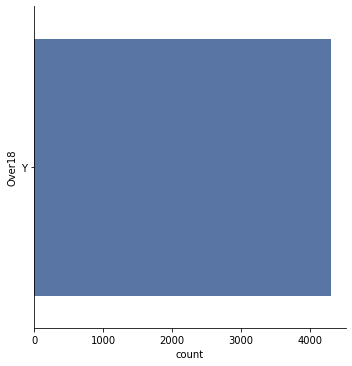

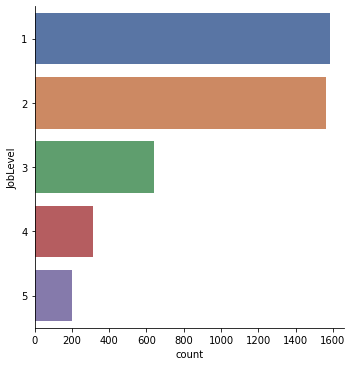

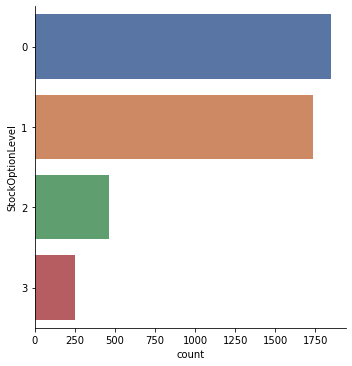

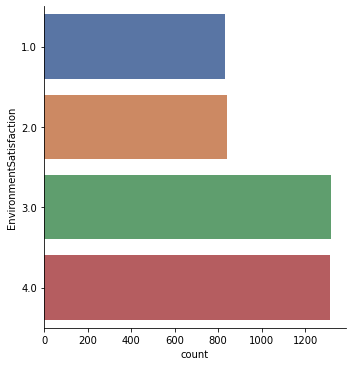

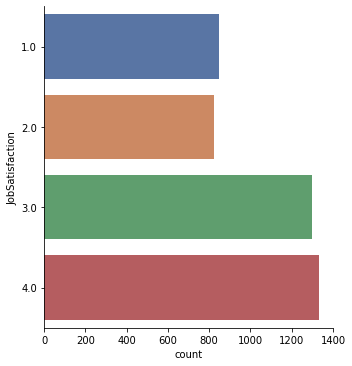

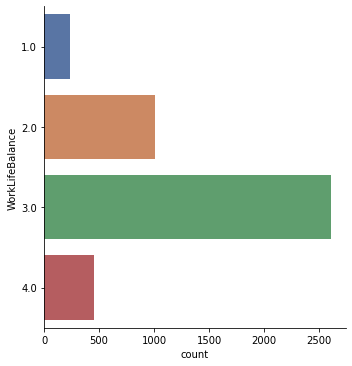

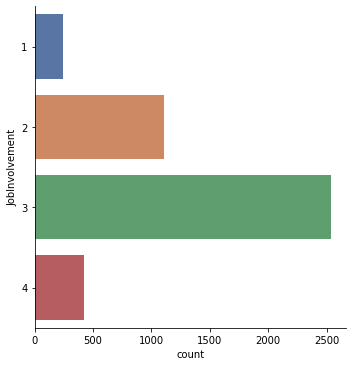

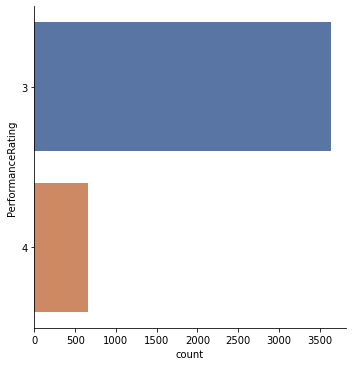

In [15]:
for v in categoricals:
    sns.catplot(y=v, kind="count", palette="deep", data=nomissings).savefig(graphs_path + f'Bar/Categoricals/{v}_without_missings_plot.png')
    
for v in ordinals:
    sns.catplot(y=v, kind="count", palette="deep", data=nomissings).savefig(graphs_path + f'Bar/Ordinals/{v}_without_missings_plot.png')    

In [114]:
pvalues = []
for v in categoricals+ordinals:
    fexp = df[v].value_counts(True).sort_index()
    fobs = nomissings[v].value_counts(True).sort_index()
    pvalues.append(chisquare(f_obs = fobs.values, f_exp = fexp.values).pvalue) 
    
aux = pd.DataFrame()
aux['variable'] = categoricals+ordinals
aux['p-value'] = pvalues
aux["¿Son iguales?"] = aux["p-value"].map(lambda x: "No" if x<0.05 else "Si")
aux

,variable,p-value,¿Son iguales?
0,BusinessTravel,0.999999,Si
1,Department,0.999997,Si
2,Education,1.000000,Si
3,EducationField,1.000000,Si
4,Gender,0.996591,Si
5,JobRole,1.000000,Si
6,MaritalStatus,0.999989,Si
7,Over18,NaN,Si
8,JobLevel,1.000000,Si
9,StockOptionLevel,1.000000,Si


In [17]:
len(nomissings)/len(df)

0.9750566893424036

Como podemos apreciar, la realidad es que el quitar los missings, no afecta en absoluto a nuestra población, perdemos información, pero esta información únicamente es el 2.5% de nuestra población inicial, sin embargo, procederemos a realizar este mismo análisis, ahora utilizando la técnica denominada imputación.

## 2.2 Imputando

In [115]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='median')
im.fit(df[continuos])

SimpleImputer(strategy='median')

In [116]:
imc = SimpleImputer(strategy='most_frequent')
imc.fit(df[categoricals + ordinals])

SimpleImputer(strategy='most_frequent')

In [117]:
imputed = df.copy()
imputed[continuos] = im.transform(imputed[continuos])
imputed[categoricals + ordinals] = imc.transform(imputed[categoricals + ordinals])

### 2.2.1 Continuas

In [118]:
from scipy.stats import ks_2samp

In [119]:
imputed.describe(percentiles = [x/10 for x in range(10)] + [.01, .99])

,Age,DistanceFromHome,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492,2.729932,3.153741,1809.142857,6.861044,8.540268,7.700653,17.966387,12.734694,0.051143,12.0,24.734694,0.908204,0.956177
std,9.133301,8.105026,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541,0.711400,0.360742,331.365241,1.347843,1.342733,1.340217,0.823259,5.503779,0.022104,0.0,5.503779,0.166348,0.167573
min,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
0%,18.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
1%,19.000000,1.000000,1.0,45.090000,1.000000,13620.600000,0.000000,11.000000,8.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1368.000000,5.054794,6.762700,5.988056,16.051500,2.000000,0.008032,12.0,14.000000,0.686747,0.740426
10%,26.000000,1.000000,1.0,441.900000,1.000000,23176.000000,0.000000,11.000000,8.0,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1440.000000,5.368500,7.044722,6.203056,16.916667,5.000000,0.020080,12.0,17.000000,0.722892,0.769565
20%,29.000000,2.000000,1.0,882.800000,1.000000,26958.000000,1.000000,12.000000,8.0,0.000000,5.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1512.000000,5.663556,7.345167,6.505778,17.266667,7.000000,0.028112,12.0,19.000000,0.759036,0.807692
30%,31.000000,3.000000,1.0,1323.700000,1.000000,33169.000000,1.000000,13.000000,8.0,0.000000,7.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1584.000000,5.960278,7.648444,6.800222,17.533333,9.000000,0.036145,12.0,21.000000,0.795181,0.842975
40%,34.000000,5.000000,1.0,1764.600000,2.000000,42288.000000,1.000000,13.000000,8.0,0.000000,8.000000,2.000000,5.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1656.000000,6.284278,7.955222,7.105944,17.766667,11.000000,0.044177,12.0,23.000000,0.831325,0.882353


/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


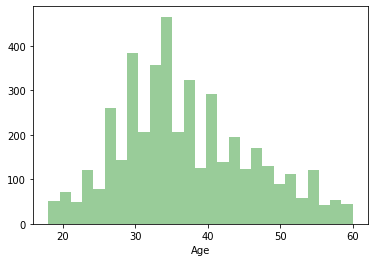

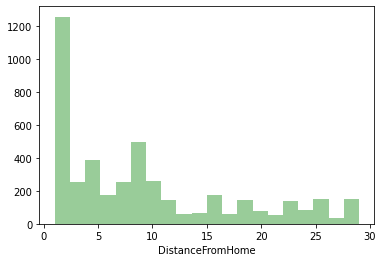

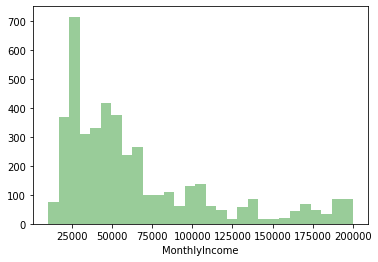

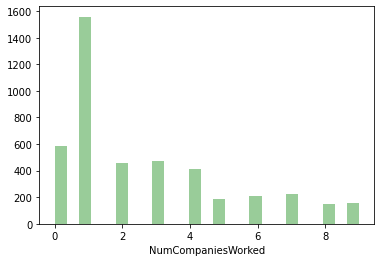

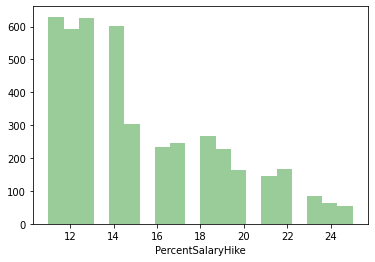

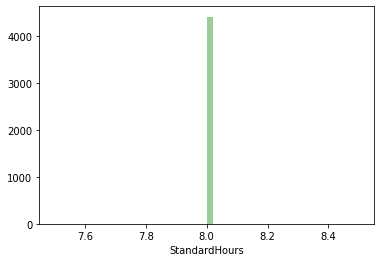

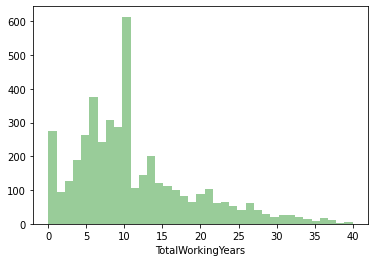

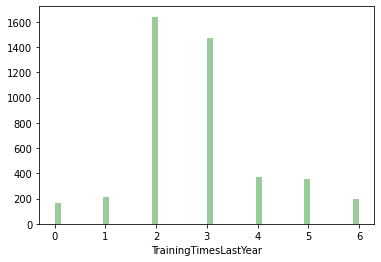

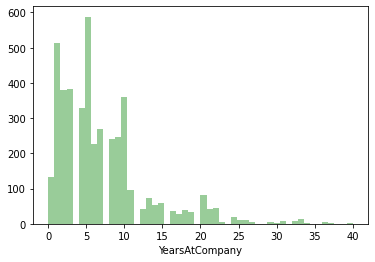

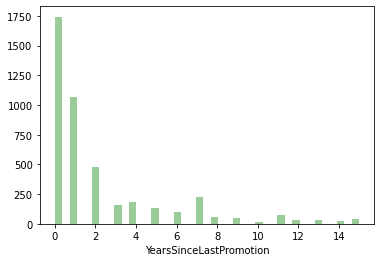

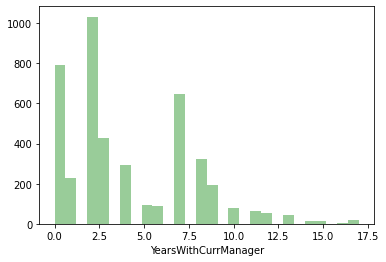

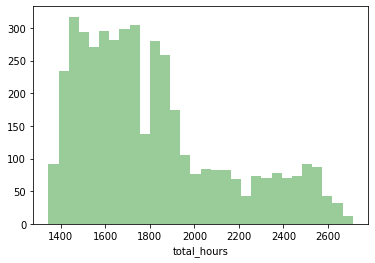

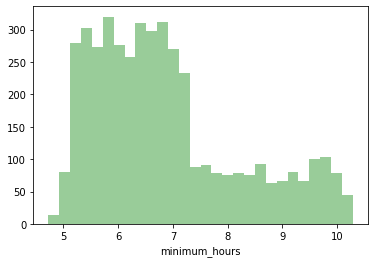

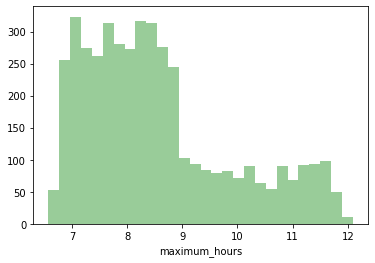

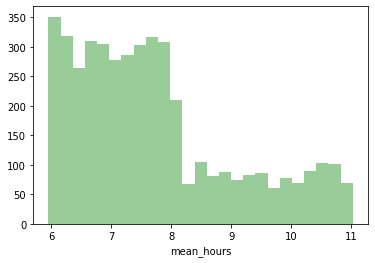

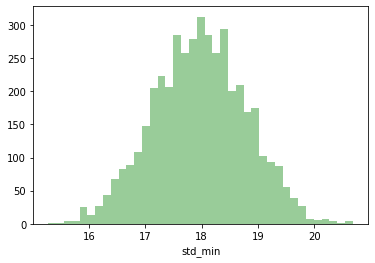

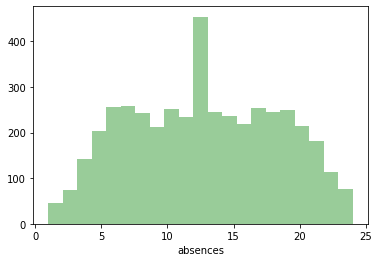

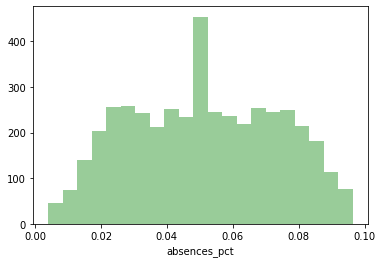

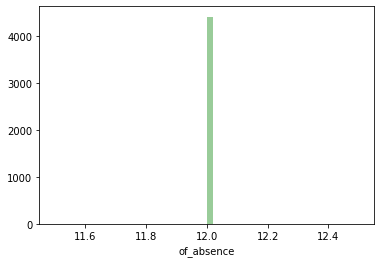

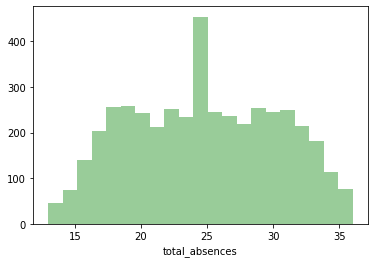

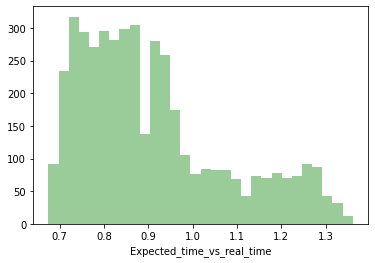

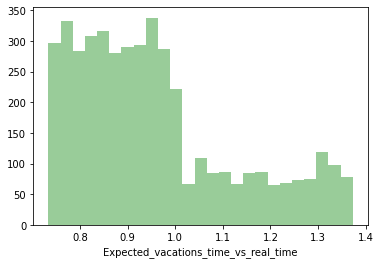

In [23]:
for v in continuos:
    plt.figure()
    sns.distplot(imputed[v],kde=False, color="green").get_figure().savefig(graphs_path + f'Hist/{v}_imputed_plot.png')

In [120]:
l_ks = []
for v in continuos:
    l_ks.append((v,ks_2samp(imputed[v],df[v]).statistic))

ks = pd.DataFrame(l_ks,columns=['feat','ks'])
ks.loc[ks['ks']>=0.1]

,feat,ks


In [121]:
ks

,feat,ks
0,Age,0.000000
1,DistanceFromHome,0.000000
2,MonthlyIncome,0.000000
3,NumCompaniesWorked,0.004308
4,PercentSalaryHike,0.000000
5,StandardHours,0.000000
6,TotalWorkingYears,0.002041
7,TrainingTimesLastYear,0.000000
8,YearsAtCompany,0.000000
9,YearsSinceLastPromotion,0.000000


Como podemos apreciar, después de aplicar la prueba de bondad y ajuste correspondiente de Kolmogorov Smirnov vemos que el elminiar los missings no afectó la distribución de nuestra tabla original. 

### 2.2.2 Discretas

In [25]:
from scipy.stats import chisquare

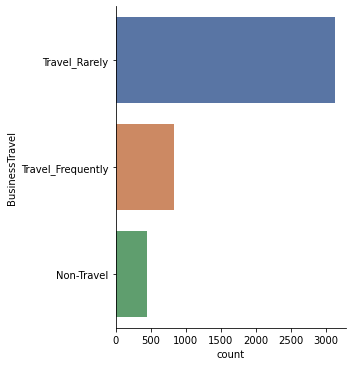

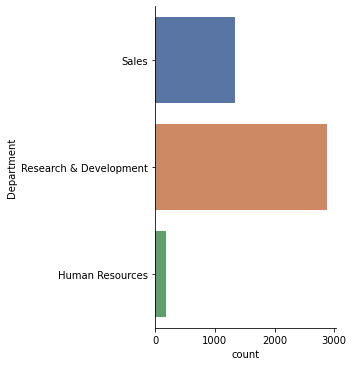

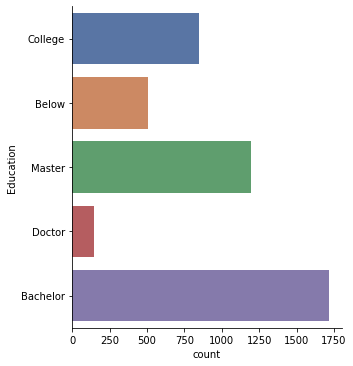

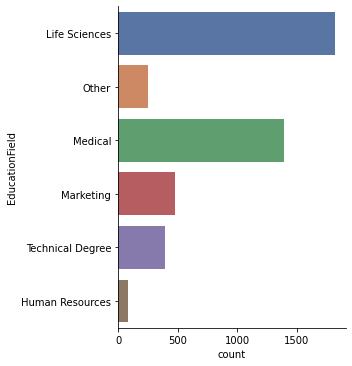

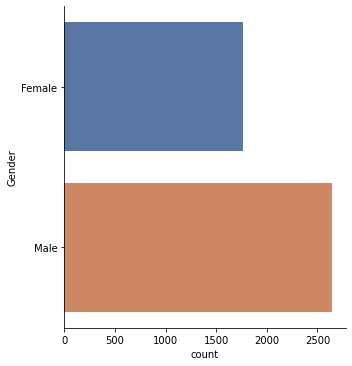

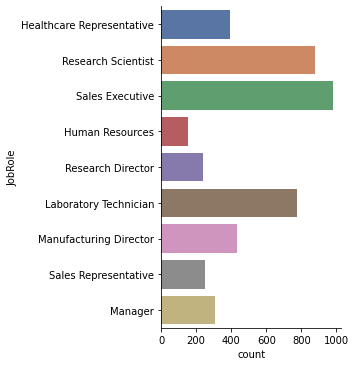

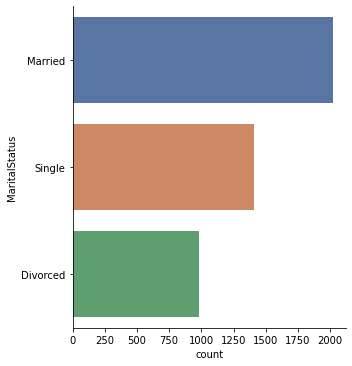

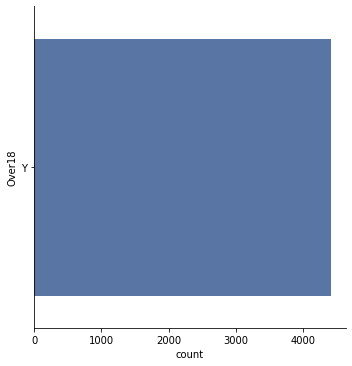

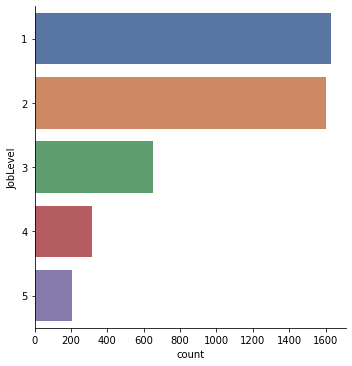

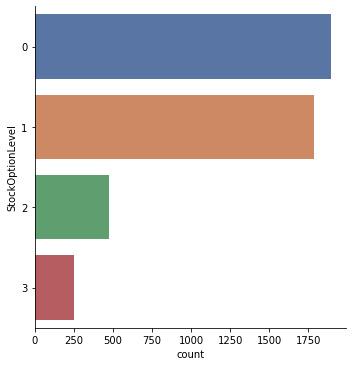

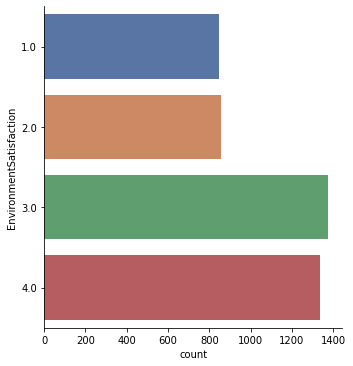

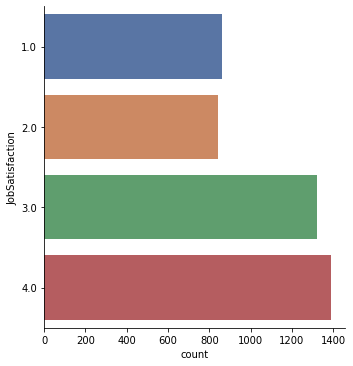

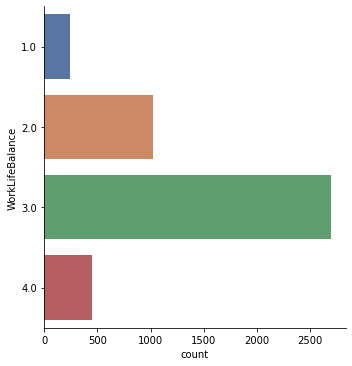

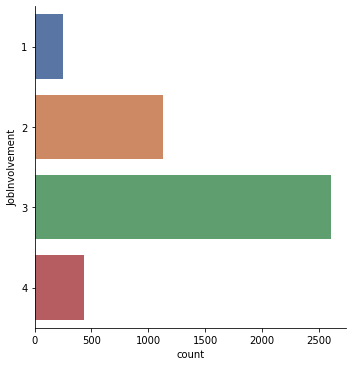

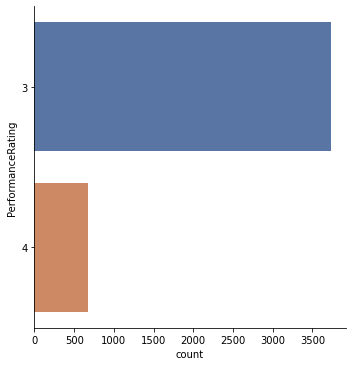

In [26]:
for v in categoricals:
    sns.catplot(y=v, kind="count", palette="deep", data=imputed).savefig(graphs_path + f'Bar/Categoricals/{v}_imputed_plot.png')
    
for v in ordinals:
    sns.catplot(y=v, kind="count", palette="deep", data=imputed).savefig(graphs_path + f'Bar/Ordinals/{v}_imputed_plot.png')    

In [122]:
pvalues = []
for v in categoricals+ordinals:
    fexp = df[v].value_counts(True).sort_index()
    fobs = imputed[v].value_counts(True).sort_index()
    pvalues.append(chisquare(f_obs = fobs.values, f_exp = fexp.values).pvalue) 
    
aux = pd.DataFrame()
aux['variable'] = categoricals+ordinals
aux['p-value'] = pvalues
aux["¿Son iguales?"] = aux["p-value"].map(lambda x: "No" if x<0.05 else "Si")
aux

,variable,p-value,¿Son iguales?
0,BusinessTravel,1.0,Si
1,Department,1.0,Si
2,Education,1.0,Si
3,EducationField,1.0,Si
4,Gender,1.0,Si
5,JobRole,1.0,Si
6,MaritalStatus,1.0,Si
7,Over18,NaN,Si
8,JobLevel,1.0,Si
9,StockOptionLevel,1.0,Si


In [28]:
len(imputed)/len(df)

1.0

Y como podemos apreciar en ningún caso se aprecia un cambio en la distribución. Debido a esto, conservaremos ambas técnicas y al momento de normalizar y quitar los outliers, revisaremos si esto altera alguna de las distribuciones y con base a eso elegiremos.

También existe la posibilidad de imputar a traves de grupos, o incluso con un modelo que permita estimar los datos ausentes, sin embargo, dichos métodos requerirían de un desarrollo mayor, y como es importante mantener la parsimonia en el proyecto para su aplicación final, no los desarrollaremos a menos que sean estrictamente necesarios. Por el momento no lo son, pues ninguna de las dos técnicas utilizadas presenta algún impacto estadísticamente significativo en nuestras distribuciones originales.

# 3. Análisis Univariado

## 3.1 Normalización de variables discretas

In [29]:
vard = [x for x in categoricals if x not in ['Over18']]

In [30]:
i = 0
for data in [df, nomissings, imputed]:
    print(i)
    for c in vard:
        print(c)
        print(data[c].value_counts(True))
        print('\n')
    print('\n'*3)    
    i += 1   

0
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64


Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64


Education
Bachelor    0.389116
Master      0.270748
College     0.191837
Below       0.115646
Doctor      0.032653
Name: Education, dtype: float64


EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64


Gender
Male      0.6
Female    0.4
Name: Gender, dtype: float64


JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative    

Con esto, podemos revisar, que únicamente sería necesario, bajo el criterio del 5% normalizar la variable de EducationField, no seleccionamos otras, a pesar de que existen variables que tienen menos del 5%, porque solamente es una, y siempre es la de Human Resources, esto puede ser importante a nivel empresarial, y dado el caso de negocio es importante que sepamos interpretar este punto, pues apoyará a establecer las reglas de negocio e identificar la solución al contratiempo actual.

No obstante, elegí normalizar la variable EducationField, porque esa variable ya cuenta con un grupo de Others, que posee más del 5%, por ende, sabemos que hay más tipos, y al momento en que Human Resources, únicamente tiene una presencia del 1%, genera un impacto mínimo, así que esta variable sí la normalizaremos.

In [31]:
vard = ['EducationField']

In [32]:
%%time
l_dd = []
l_rem = []
th = 0.05
for d in [nomissings, imputed]:
    for v in vard:
        aux = d[v].value_counts(True).to_frame()
        aux['id'] = range(len(aux))
        aux['full'] = (aux[v]>=th)
        aux['map'] = np.where(aux['full'],aux.index,'Other')
        if aux.loc[aux['map']=='Other'][v].sum()<th:
            aux['map'] =aux['map'].replace({'Other',aux.head(1)['map'].to_string(index=False)}) 
        aux = aux[['map']]
        l_dd.append((v,aux.to_dict()['map']))
        
for data in [nomissings, imputed]:
    for v,d in l_dd:
        data[v] = data[v].replace(d)
        print("%s\n"%v)
        if len(data[v].value_counts(True))==1:
            data.drop(v,axis=1,inplace=True)
            l_rem.append(v)
            vard = [v for v in vard if v not in l_rem]
        else:
            print(data[v].value_counts(True))
        print("\n")        

EducationField

Life Sciences       0.410698
Medical             0.317209
Marketing           0.109070
Technical Degree    0.089302
Other               0.073721
Name: EducationField, dtype: float64


EducationField

Life Sciences       0.410698
Medical             0.317209
Marketing           0.109070
Technical Degree    0.089302
Other               0.073721
Name: EducationField, dtype: float64


EducationField

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.074150
Name: EducationField, dtype: float64


EducationField

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.074150
Name: EducationField, dtype: float64


CPU times: user 49.8 ms, sys: 6.64 ms, total: 56.4 ms
Wall time: 53.4 ms


/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Podemos apreciar que en algunos casos, la categoría Other tiene menos del 5%, sin embargo, el hecho de que no haya una categoría altamente dominante genera que sea aceptable para este caso de negocio y esta empresa en particular el tener esa categoría, pues si la movemos a la categoría más grande, generará un reajuste en nuestra distribución, que podría impactar al momento de modelar y predecir el fenómeno de interés.

## 3.2 Valores extremos en las variables continuas

In [33]:
df[continuos].describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.694830,15.209524,8.0,11.279936,2.799320,7.008163,2.187755,4.123129,1809.142857,6.861044,8.540268,7.700653,17.966387,12.734694,0.051143,12.0,24.734694,0.908204,0.956177
std,9.133301,8.105026,47068.888559,2.498887,3.659108,0.0,7.782222,1.288978,6.125135,3.221699,3.567327,331.365241,1.347843,1.342733,1.340217,0.823259,5.503779,0.022104,0.0,5.503779,0.166348,0.167573
min,18.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000,1560.000000,5.814097,7.514444,6.673125,17.383333,8.000000,0.032129,12.0,20.000000,0.783133,0.825563
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000,1728.000000,6.583611,8.254722,7.406667,17.966667,13.000000,0.052209,12.0,25.000000,0.867470,0.921053
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,8.0,15.000000,3.000000,9.000000,3.000000,7.000000,1944.000000,7.482917,9.186111,8.368542,18.533333,17.000000,0.068273,12.0,29.000000,0.975904,1.038462
max,60.000000,29.000000,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000,2712.000000,10.284722,12.088611,11.030833,20.683333,24.000000,0.096386,12.0,36.000000,1.361446,1.372881


In [34]:
nomissings[continuos].describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,65059.844186,2.690000,15.210698,8.0,11.285116,2.796279,7.026047,2.190000,4.132558,1809.661395,6.863203,8.542650,7.702739,17.964457,12.729302,0.051122,12.0,24.729302,0.908465,0.956447
std,9.146517,8.097059,47045.398914,2.495764,3.662777,0.0,7.790052,1.290142,6.148036,3.230818,3.565831,331.707840,1.350142,1.345052,1.342715,0.823957,5.494883,0.022068,0.0,5.494883,0.166520,0.167887
min,18.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
25%,30.000000,2.000000,29260.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000,1560.000000,5.810556,7.512847,6.666667,17.383333,8.000000,0.032129,12.0,20.000000,0.783133,0.825328
50%,36.000000,7.000000,49360.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000,1728.000000,6.585000,8.256806,7.407361,17.966667,13.000000,0.052209,12.0,25.000000,0.867470,0.921053
75%,43.000000,14.000000,83802.500000,4.000000,18.000000,8.0,15.000000,3.000000,9.250000,3.000000,7.000000,1968.000000,7.488611,9.197431,8.380694,18.533333,17.000000,0.068273,12.0,29.000000,0.987952,1.039474
max,60.000000,29.000000,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000,2712.000000,10.284722,12.088611,11.030833,20.683333,24.000000,0.096386,12.0,36.000000,1.361446,1.372881


In [35]:
imputed[continuos].describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,total_hours,minimum_hours,maximum_hours,mean_hours,std_min,absences,absences_pct,of_absence,total_absences,Expected_time_vs_real_time,Expected_vacations_time_vs_real_time
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.691837,15.209524,8.0,11.277324,2.799320,7.008163,2.187755,4.123129,1809.142857,6.861044,8.540268,7.700653,17.966387,12.734694,0.051143,12.0,24.734694,0.908204,0.956177
std,9.133301,8.105026,47068.888559,2.493912,3.659108,0.0,7.774490,1.288978,6.125135,3.221699,3.567327,331.365241,1.347843,1.342733,1.340217,0.823259,5.503779,0.022104,0.0,5.503779,0.166348,0.167573
min,18.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,1344.000000,4.726944,6.575000,5.950278,15.283333,1.000000,0.004016,12.0,13.000000,0.674699,0.733624
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000,1560.000000,5.814097,7.514444,6.673125,17.383333,8.000000,0.032129,12.0,20.000000,0.783133,0.825563
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000,1728.000000,6.583611,8.254722,7.406667,17.966667,13.000000,0.052209,12.0,25.000000,0.867470,0.921053
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,8.0,15.000000,3.000000,9.000000,3.000000,7.000000,1944.000000,7.482917,9.186111,8.368542,18.533333,17.000000,0.068273,12.0,29.000000,0.975904,1.038462
max,60.000000,29.000000,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000,2712.000000,10.284722,12.088611,11.030833,20.683333,24.000000,0.096386,12.0,36.000000,1.361446,1.372881


Como podemos ver, tenemos dos variables unarias, por esto, no las utilizaremos en los siguientes análisis, así que renombraremos la lista:

In [36]:
varc = [x for x in continuos if x not in ['StandardHours', 'of_absence']]

In [37]:
for data in [df, nomissings, imputed]:
    for v in varc:
        lb,ub = np.percentile(data[v],1),np.percentile(data[v],99)
        data['ol_%s'%v] = ((data[v]<lb)|(data[v]>ub)).astype(int)
    l_ol = [v for v in data.columns if v[:2]=='ol']
    data['ex'] = (data[l_ol].sum(axis=1)>=1).astype(int)
    print(data['ex'].value_counts(True))

0    0.878231
1    0.121769
Name: ex, dtype: float64
0    0.88
1    0.12
Name: ex, dtype: float64
0    0.871655
1    0.128345
Name: ex, dtype: float64


/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df['ex'].value_counts(True)

0    0.878231
1    0.121769
Name: ex, dtype: float64

In [39]:
nomissings['ex'].value_counts(True)

0    0.88
1    0.12
Name: ex, dtype: float64

In [40]:
imputed['ex'].value_counts(True)

0    0.871655
1    0.128345
Name: ex, dtype: float64

Podemos observar que si utilizamos este método, realmente tiraremos demasiada información, pero podemos apreciar que el imputar sí generó un pequeño reajuste.

Procedmos a borrar estas columnas.

In [41]:
df.drop(l_ol+['ex'],axis=1,inplace=True)
nomissings.drop(l_ol+['ex'],axis=1,inplace=True)
imputed.drop(l_ol+['ex'],axis=1,inplace=True)

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Por ende, debido a esto y a que no se ven casos extremos al momento de describir los datos, dejaremos las variables continuas así. 

# 4. Multicolinealidad

## 4.1 VarClusHi

In [42]:
from varclushi import VarClusHi

In [43]:
vci = VarClusHi(imputed[varc])
vci.varclus()
auxi = vci.rsquare.copy()
auxi = auxi.sort_values(['Cluster','RS_Ratio'],ascending=[1,1]).reset_index(drop=True)
auxi['k'] = auxi.groupby('Cluster').cumcount()+1

vcn = VarClusHi(nomissings[varc])
vcn.varclus()
auxn = vcn.rsquare.copy()
auxn = auxn.sort_values(['Cluster','RS_Ratio'],ascending=[1,1]).reset_index(drop=True)
auxn['k'] = auxn.groupby('Cluster').cumcount()+1

In [44]:
varci = auxi.loc[auxi.k==1]['Variable'].to_list()
varcn = auxn.loc[auxn.k==1]['Variable'].to_list()

In [45]:
varci

['Expected_vacations_time_vs_real_time',
 'YearsAtCompany',
 'absences',
 'Age',
 'DistanceFromHome',
 'std_min']

In [46]:
varcn

['Expected_vacations_time_vs_real_time',
 'YearsAtCompany',
 'absences',
 'Age',
 'DistanceFromHome',
 'std_min']

## 4.2 SelectKBest

In [47]:
from sklearn.feature_selection import SelectKBest

### 4.2.1 Precluster

In [48]:
from sklearn.cluster import KMeans

In [49]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'total_hours', 'minimum_hours',
       'maximum_hours', 'mean_hours', 'std_min', 'absences', 'absences_pct',
       'of_absence', 'total_absences', 'Expected_time_vs_real_time',
       'Expected_vacations_time_vs_real_time'],
      dtype='object')

In [50]:
df['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [51]:
#Número de clusters

k = len(set(df['JobRole']))

In [52]:
kmi = KMeans(n_clusters=k,max_iter=len(imputed)*2)

kmn = KMeans(n_clusters=k,max_iter=len(nomissings)*2)

In [53]:
Ximp = imputed[varc]
Xnmiss = nomissings[varc]

In [54]:
%%time
kmi.fit(Ximp)
kmn.fit(Xnmiss)

CPU times: user 1.43 s, sys: 387 ms, total: 1.81 s
Wall time: 486 ms


KMeans(max_iter=8600, n_clusters=9)

In [55]:
variables_numnomiss = len(varcn)
variables_numimp = len(varci)

In [56]:
skmiss = SelectKBest(k=variables_numnomiss)
skimp = SelectKBest(k=variables_numimp)

In [57]:
skmiss.fit(Xnmiss,kmn.predict(Xnmiss))
skimp.fit(Ximp,kmi.predict(Ximp))

SelectKBest(k=6)

In [58]:
bestim = [a for a,b in zip(varc,skimp.get_support()) if b]
bestmiss = [a for a,b in zip(varc,skmiss.get_support()) if b]

In [59]:
print(bestim)
print(bestmiss)

['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']
['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']


Aquí, podemos apreciar, que tenemos una selección diferente, tenemos para el caso de imputado la variable 'DistanceFromHome' y para la de missings tenemos 'YearsWithCurrentManager', para el algoritmo de SelectKBest, y además tenemos los de Varclushi, seleccionadas por multicolinealidad. Así que tenemos las siguientes listas de variables:

## 4.3 Variables para clusterizar:

### Imputed:

#### Varclushi:

In [60]:
varci

['Expected_vacations_time_vs_real_time',
 'YearsAtCompany',
 'absences',
 'Age',
 'DistanceFromHome',
 'std_min']

#### KBest:

In [61]:
bestim

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion']

### NoMissings:

#### Varclushi:

In [62]:
varcn

['Expected_vacations_time_vs_real_time',
 'YearsAtCompany',
 'absences',
 'Age',
 'DistanceFromHome',
 'std_min']

#### KBest:

In [63]:
bestmiss

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion']

Debido a estos resultados procederemos a generar únicamente dos clusters, uno para KBest y el otro para VarClusHi, pero únicamente con la tabla de imputed. Pues ya en este punto podemos ver que el desempeño de ambos es sumamente similar, y pensando en la aplicación de negocio, para la incorporación de nuevos datos será necesario darle el tratamiento a los valores ausentes, y para evitar tirarlo, hemos seleccionado que el método adecuado será el de imputar.

# 5. Visualización multivariada

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [65]:
Xbest = imputed[bestim].copy()
Xclus = imputed[varci].copy()

beststd = StandardScaler()
bestmm = MinMaxScaler()
clusstd = StandardScaler()
clusmm = MinMaxScaler()

beststd.fit(Xbest)
bestmm.fit(Xbest)
clusstd.fit(Xclus)
clusmm.fit(Xclus)

Xbeststd = pd.DataFrame(beststd.transform(Xbest), columns = bestim)
Xbestmm = pd.DataFrame(bestmm.transform(Xbest), columns = bestim)
Xclusstd = pd.DataFrame(clusstd.transform(Xclus), columns = varci)
Xclusmm = pd.DataFrame(clusmm.transform(Xclus), columns = varci)

In [66]:
# PCA

pcabest = PCA(n_components=2)
pcaclus = PCA(n_components=2)

pcabest.fit(Xbeststd)
print('Best: \n')
print(pcabest.explained_variance_ratio_.cumsum())
print('\n')
pcaclus.fit(Xclusstd)
print('Clus: \n')
print(pcaclus.explained_variance_ratio_.cumsum())
print('\n')

Best: 

[0.22616579 0.41141921]


Clus: 

[0.21963128 0.42785905]




Podeos apreciar que en ambos casos la varianza explicada es mínima, y sumamente similar, por ende, procedermos a realizar las visualizaciones con MDS y con TSNE.

In [67]:
bestmds = MDS(n_components=2,n_jobs=-1)
besttsne =TSNE(n_components=2,n_jobs=-1)
clusmds = MDS(n_components=2,n_jobs=-1)
clustsne =TSNE(n_components=2,n_jobs=-1)

In [68]:
%%time
clusxmds = pd.DataFrame(clusmds.fit_transform(Xclusmm),columns=['d1','d2'])
clusxtsn = pd.DataFrame(clustsne.fit_transform(Xclusmm),columns=['t1','t2'])

CPU times: user 2min 12s, sys: 2.17 s, total: 2min 14s
Wall time: 8min 31s


In [69]:
%%time
bestxmds = pd.DataFrame(bestmds.fit_transform(Xbestmm),columns=['d1','d2'])
bestxtsn = pd.DataFrame(besttsne.fit_transform(Xbestmm),columns=['t1','t2'])

CPU times: user 2min 9s, sys: 6.08 s, total: 2min 15s
Wall time: 18min 20s


## Best

In [70]:
bestxmds[tar] = clusxtsn[tar] = bestxtsn[tar] = clusxmds[tar] = imputed[tar]

In [71]:
graphs_path

'/Users/rolandooviedo/Documentos/Github/Proyecto/Graphs/'

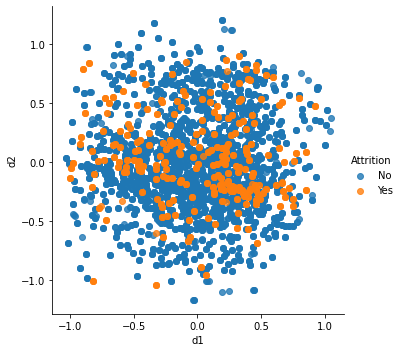

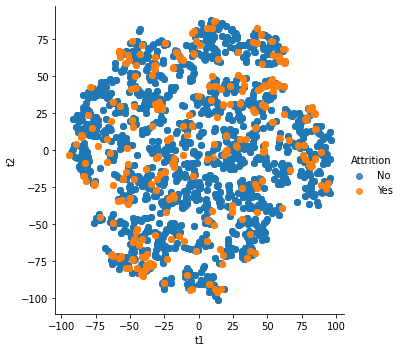

In [72]:
sns.lmplot(data=bestxmds,x='d1',y='d2',fit_reg=False, hue = tar).savefig(graphs_path + 'Multivariado/bestxmds.png')
sns.lmplot(data=bestxtsn,x='t1',y='t2',fit_reg=False, hue = tar).savefig(graphs_path + 'Multivariado/bestxtsn.png')

## Clus

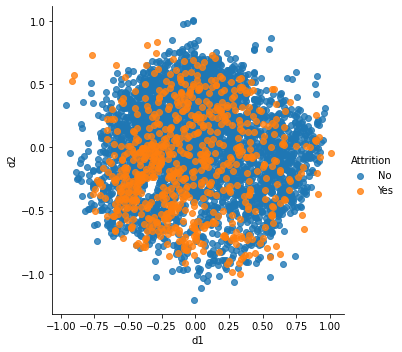

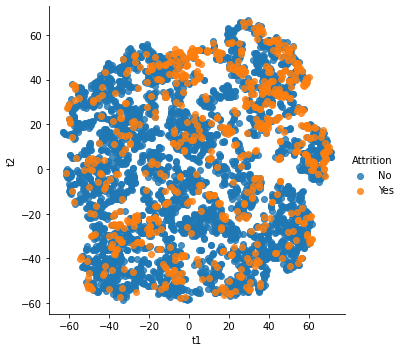

In [73]:
sns.lmplot(data=clusxmds,x='d1',y='d2',fit_reg=False, hue = tar).savefig(graphs_path + 'Multivariado/clusxmds.png')
sns.lmplot(data=clusxtsn,x='t1',y='t2',fit_reg=False, hue = tar).savefig(graphs_path + 'Multivariado/clusxtsn.png')

Realmente no se puede apreciar como tal de forma visual un número de clusters propuestos para realizar nuestro modelo, por lo que utilizaremos la inercia de los clusters para definir el número de estos, y de igual forma, generaremos las visualizaciones pero ahora iluminaremos los puntos con base al cluster al que pertenecen.

# 6. Clustering

In [74]:
import matplotlib.pyplot as plt

In [75]:
names = ['Imputado', 'Imputed VarClusHi', 'Imputado Best', 'Escalado Best', 'Escalado VarClusHi']
frames = [Ximp, Ximp[varci], Ximp[bestim], Xbestmm, Xclusmm]

names_frames = dict(zip(names, frames))

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_km

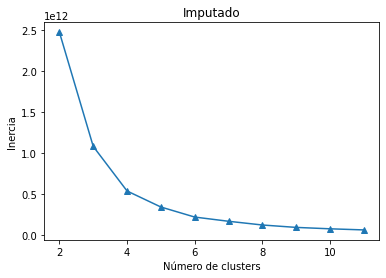

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_km

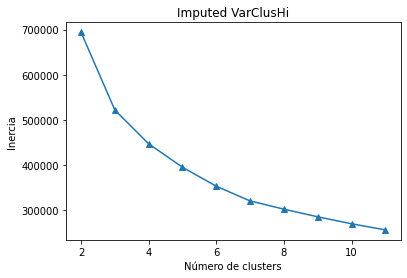

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_km

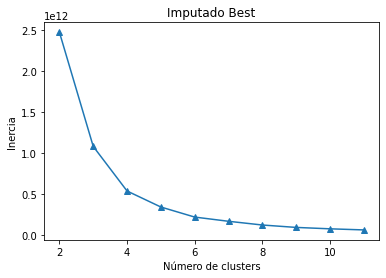

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_km

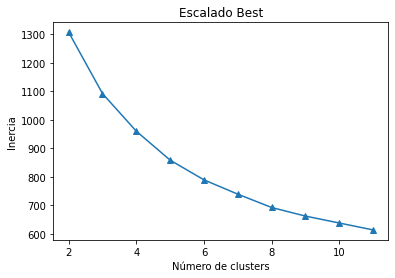

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_km

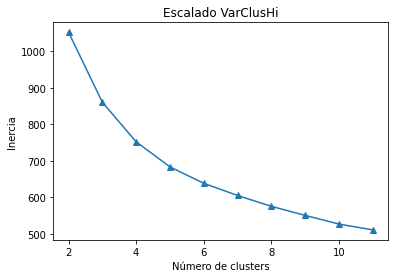

In [76]:
for name in names:
    l_in = []
    for k in range(2,12):
        km = KMeans(n_clusters=k,n_jobs=-1,max_iter=len(names_frames.get(name)))
        km.fit(names_frames.get(name))
        l_in.append(km.inertia_)

    plt.figure()    
    plt.plot(range(2,12),l_in,marker='^')
    plt.title(name)
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.savefig(graphs_path + 'Clus/' + name + '.png')
    plt.show()

Esto nos deja claro que el número de clusters adecuado sería 4, por ende procederemos a realizar el modelo con 4 clusters y el modelo lo haremos con Gausianos, pues nos interesa modelar probabilidades y distribuciones de empleados, con base al comportamiento de estos.

Y con base en los resultados de estos gráficos, podemos concluir que para realizar nuestro modelo de clustering, únicamente vale la pena utilizar, o todas las variables del dataframe Imputed, o únicamente las columnas seleccionadas por el método KBest del dataframe Imputed, por ende procederemos con esos dos casos.

# 7. Clusters finales

In [77]:
climp = Ximp.copy()
clbest = Ximp[bestim].copy()

Ahora realizaremos dos modelos, uno de KMeans y otro de Gaussian Mixture, en este caso serán dos modelos por tabla, así prosegiremos:

In [78]:
from sklearn.mixture import GaussianMixture

In [79]:
k = 4

In [80]:
kmimp = KMeans(n_clusters=k,n_jobs=-1,max_iter=len(climp)*2)
gmimp = GaussianMixture(n_components=k,max_iter=len(climp)*2)
kmbest = KMeans(n_clusters=k,n_jobs=-1,max_iter=len(clbest)*2)
gmbest = GaussianMixture(n_components=k,max_iter=len(clbest)*2)

In [81]:
kmimp.fit(climp)
gmimp.fit(climp)

kmbest.fit(clbest)
gmbest.fit(clbest)

/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/rolandooviedo/Documentos/Github/pyt37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


GaussianMixture(max_iter=8820, n_components=4)

In [82]:
bestxmds['km_imp'] = kmimp.predict(climp)
bestxmds['gm_imp'] = gmimp.predict(climp)

bestxmds['km_best'] = kmbest.predict(clbest)
bestxmds['gm_best'] = gmbest.predict(clbest)

In [83]:
bestxtsn['km_imp'] = kmimp.predict(climp)
bestxtsn['gm_imp'] = gmimp.predict(climp)

bestxtsn['km_best'] = kmbest.predict(clbest)
bestxtsn['gm_best'] = gmbest.predict(clbest)

In [84]:
bestxmds

,d1,d2,Attrition,km_imp,gm_imp,km_best,gm_best
0,0.223561,-0.771539,No,2,1,1,2
1,0.276771,0.057550,Yes,3,1,0,3
2,0.829716,0.139166,No,1,1,2,1
3,-0.110841,-0.571184,No,2,3,1,2
4,-0.123025,0.163456,No,3,0,0,3
...,...,...,...,...,...,...,...
4405,-0.185277,-0.234977,No,0,0,3,3
4406,0.071771,-0.161492,No,3,2,0,3
4407,0.527888,0.552374,No,3,1,0,3
4408,0.274215,0.483553,No,3,1,0,2


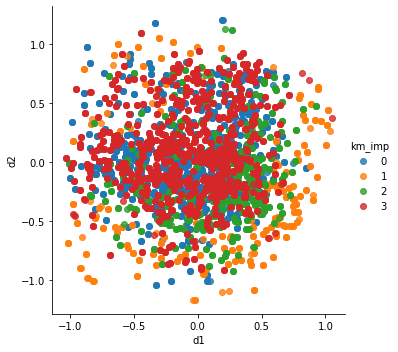

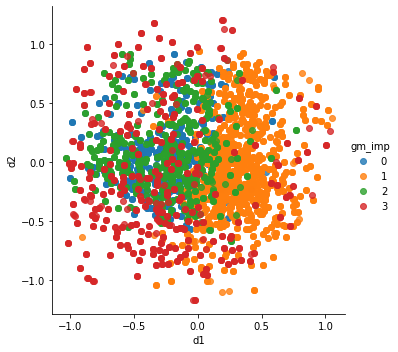

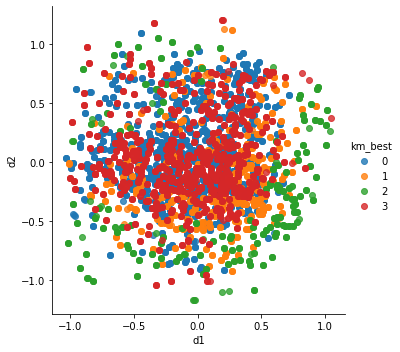

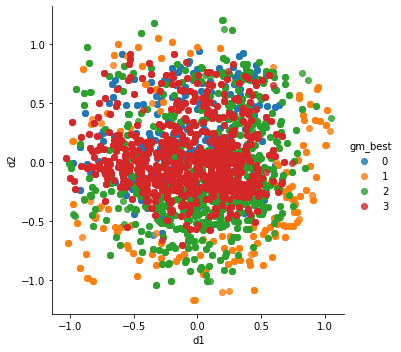

In [85]:
names = ['KMeans Imputado MDS', 'Gaussian Imputado MDS', 'KMeans Best MDS', 'Gaussian Best MDS']
values = ['km_imp', 'gm_imp', 'km_best', 'gm_best']
fplots = dict(zip(names, values))

for n in names:
    sns.lmplot(data=bestxmds,x='d1',y='d2',fit_reg=False,hue=fplots[n]).savefig(graphs_path + f'Clus/MDS_{n}.png')

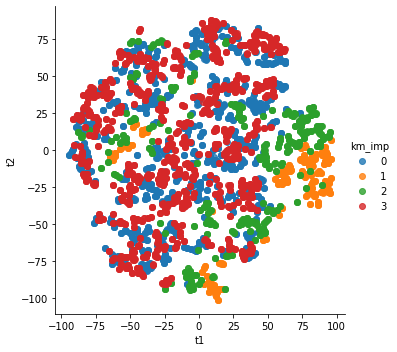

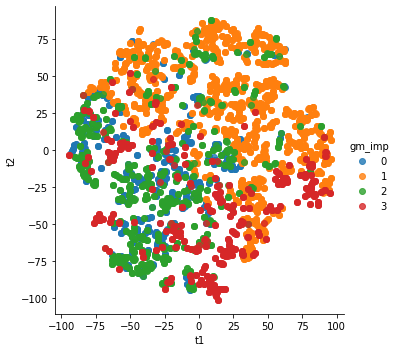

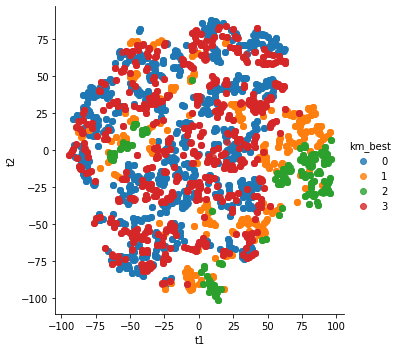

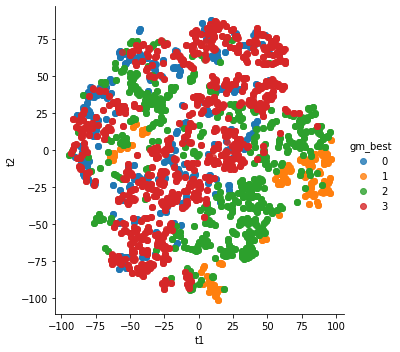

In [86]:
names = ['KMeans Imputado TSNE', 'Gaussian Imputado TSNE', 'KMeans Best TSNE', 'Gaussian Best TSNE']
values = ['km_imp', 'gm_imp', 'km_best', 'gm_best']
fplots = dict(zip(names, values))

for n in names:
    sns.lmplot(data=bestxtsn,x='t1',y='t2',fit_reg=False,hue=fplots[n]).savefig(graphs_path + f'Clus/TSNE_{n}.png')

Como podemos apreciar, realmente el modelo que nos parece interesante es el Gaussian Mixture aplicado al dataframe Imputed, pues es el que presenta un mejor resultado y una visualización más clara. Debido a esto, crearemos lo siguiente:

In [87]:
imputed.shape

(4410, 40)

In [88]:
Ximp.shape

(4410, 20)

In [89]:
TDA_cl = imputed.copy()
TDA_cl['cl'] = gmimp.predict(climp)

In [90]:
output_path = path[:-len('notebooks')] + 'Outputs/'
output_path

'/Users/rolandooviedo/Documentos/Github/Proyecto/Outputs/'

In [91]:
TDA_cl.to_csv(output_path + 'TAD+cl_gmimp.csv', index = False)